In [132]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [133]:
stocks = ['MMM', 'AMZN', 'KO', 'CSCO'] #portfolio components
#stocks = []
#stocks = []

weights = [0.25, 0.25, 0.25, 0.25] #percentage of the components in portfolio
historical_data = yf.download(stocks, start='2018-01-01') #download data from date selected
historical_data.head() #print preview

[*********************100%***********************]  4 of 4 completed


Adj Close                                        Close             \
                 AMZN       CSCO         KO         MMM       AMZN       CSCO   
Date                                                                            
2018-01-02  59.450500  33.400414  39.119381  199.068924  59.450500  38.860001   
2018-01-03  60.209999  33.666840  39.033478  199.060455  60.209999  39.169998   
2018-01-04  60.479500  33.762108  39.583237  201.662491  60.479500  38.990002   
2018-01-05  61.457001  34.229691  39.574654  203.233765  61.457001  39.529999   
2018-01-08  62.343498  34.584717  39.514523  202.574829  62.343498  39.939999   

                                        High             ...        Low  \
                   KO         MMM       AMZN       CSCO  ...         KO   
Date                                                     ...              
2018-01-02  45.540001  235.639999  59.500000  38.950001  ...  45.509998   
2018-01-03  45.439999  235.630005  60.274502  39.279999  ...  45.340000   
2018-01-04  46.080002  238.710007  60.793499  39.540001  ...  45.450001   
2018-01-05  46.070000  240.570007  61.457001  39.880001  ...  45.790001   
2018-01-08  46.000000  239.789993  62.653999  39.959999  ...  45.880001   

                             Open                                      Volume  \
                   MMM       AMZN       CSCO         KO         MMM      AMZN   
Date                                                                            
2018-01-02  232.809998  58.599998  38.669998  45.910000  235.779999  53890000   
2018-01-03  233.289993  59.415001  38.720001  45.490002  235.070007  62176000   
2018-01-04  236.470001  60.250000  39.049999  45.560001  237.000000  60442000   
2018-01-05  237.740005  60.875500  39.549999  46.020000  238.649994  70894000   
2018-01-08  239.179993  61.799999  39.520000  45.950001  239.380005  85590000   

                                         
                CSCO        KO      MMM  
Date                                     
2018-01-02  20135700  10872200  2931000  
2018-01-03  29536000  12635600  2193700  
2018-01-04  20731400  12709400  2243100  
2018-01-05  24588200  13113100  1835900  
2018-01-08  16582000   7068600  1869000  

[5 rows x 24 columns]

In [134]:
close_price = historical_data['Close'].pct_change() #percentage of return between open price and close price
portfolio_return = (close_price * weights).sum(axis=1)
cumulative_return = (portfolio_return + 1).cumprod()
cumulative_return.head()

Date
2018-01-02    1.000000
2018-01-03    1.004629
2018-01-04    1.011419
2018-01-05    1.020923
2018-01-08    1.026037
dtype: float64

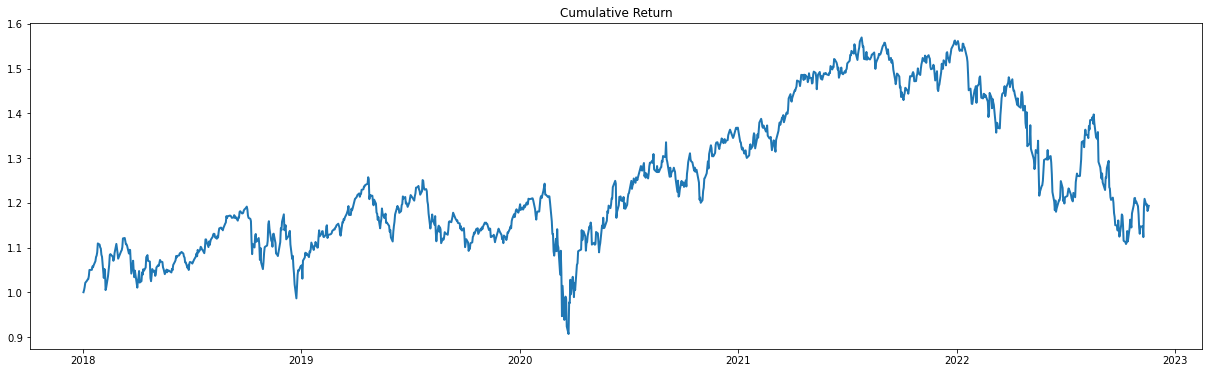

In [135]:
#data 
x = cumulative_return.keys()
y = cumulative_return

fig, ax = plt.subplots(figsize=(21,6))
ax.plot(x, y, linewidth=2.0)
ax.set_title('Cumulative Return')

plt.show()

In [208]:
portfolio_weights=[]
portfolio_returns=[]
portfolio_risk=[]
portfolio_sharpe=[]

def optimization(close):
    random_stocks = np.random.uniform(size=len(close.columns))
    random_stocks = random_stocks / np.sum(random_stocks)

    portfolio_weights.append(random_stocks) #portfolio percentage

    mean = (close.mean() * random_stocks).sum() * 252 #return
    portfolio_returns.append(mean)

    volatility = (close * random_stocks).sum(axis=1) #portfolio risk 
    annual_std = np.std(volatility) * np.sqrt(252)
    portfolio_risk.append(annual_std)

    sharpe_ratio = (np.mean(volatility) / np.std(volatility)) * np.sqrt(252)
    portfolio_sharpe.append(sharpe_ratio)


count = 1000
for k in range(0, count):
    optim = optimization(close_price)

In [209]:
# El Ratio de Sharpe es la rentabilidad que ofrece una inversión por cada unidad de riesgo que asume.
max_sharpe_ratio = np.argmax(portfolio_sharpe)
max_portfolio_weights = portfolio_weights[max_sharpe_ratio]
print(f"Max sharpe ratio: {portfolio_sharpe[max_sharpe_ratio]}")

print("portfolio")
for i in range(len(max_portfolio_weights)):
    print(close_price.columns[i], max_portfolio_weights[i])


Max sharpe ratio: 0.5055964135372358
portfolio
AMZN 0.547637195060684
CSCO 0.01964212586230162
KO 0.41704373051262655
MMM 0.015676948564387783


##### results with count: 1000
- Max sharpe ratio: 0.49808106941354274
- Portfolio with the higher Sharpe ratio: [0.61601211 0.01377951 0.35576994 0.01443845]

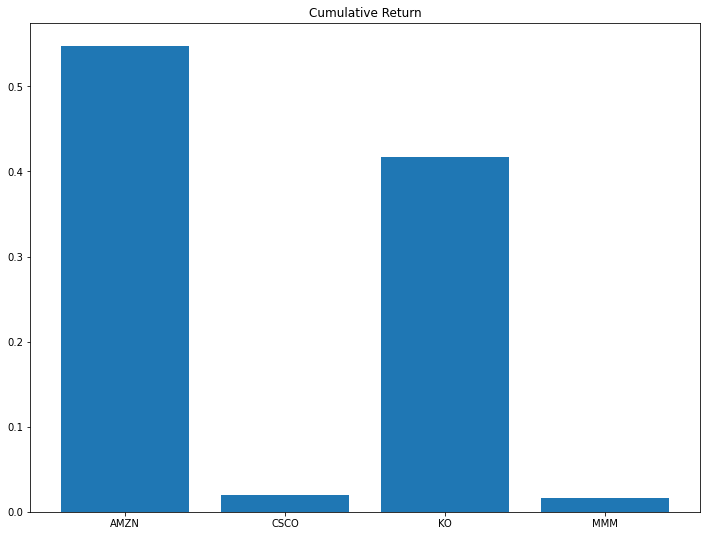

In [210]:
#Composition portfolio 
#data 
x = close_price.columns
y = max_portfolio_weights

fig, ax = plt.subplots(figsize=(12,9))
ax.bar(x, y)
ax.set_title('Cumulative Return')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

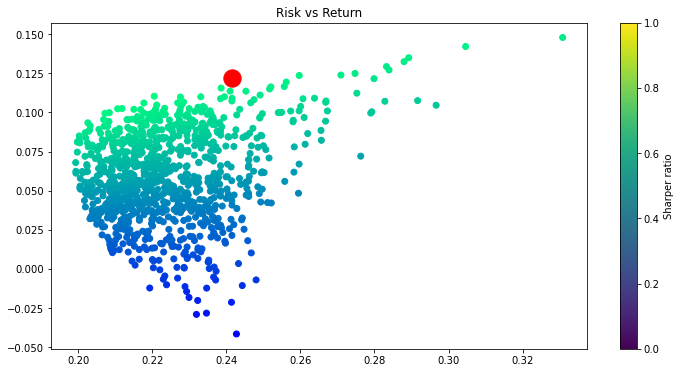

In [211]:
# Efficient Frontier
max_ratio = max_sharpe_ratio

x = portfolio_risk
y = portfolio_returns


fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x, y, c=portfolio_sharpe, cmap='winter') #Efficient Frontier between risk and return
ax.set_title('Risk vs Return')


plt.scatter(x[max_ratio], y[max_ratio], color='r', marker='o', s=300) #sharpe ratio
plt.colorbar(label='Sharper ratio')

plt.show

In [221]:
# save files
datacsv = []
for i in range(len(portfolio_weights)):
    data = np.append(portfolio_weights[i], portfolio_sharpe[i])
    datacsv.append(data)

#portfolio_weights.insert(0, close_price.columns.to_list())
np.savetxt("p_weights.csv", datacsv, delimiter="; ", fmt='% s')
#np.savetxt("p_sharpe.csv", portfolio_sharpe, delimiter="; ", fmt='% s')
print(type(datacsv))

<class 'list'>
